<a href="https://colab.research.google.com/github/dothihong14/BTL_AI_Nhom9/blob/main/Mobilenest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from keras.applications import MobileNet
from tensorflow.keras.layers import Flatten,Dense,Dropout
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os

In [8]:
batch_size = 32 # sử dụng 32 mẫu trong mỗi lần huấn luyện
img_height = 150 # chiều cao ảnh
img_width = 150 # chiều rộng ảnh

In [9]:
from imutils import paths
imgTrain = list(paths.list_images("/content/drive/MyDrive/Acne/Train"))
imgTest = list(paths.list_images("/content/drive/MyDrive/Acne/Test"))

In [10]:
X_train = []
y_train = []

In [11]:
for path_train in imgTrain:

	Y_train = path_train.split(os.path.sep)[-2]

	# Xu ly anh
	img = cv2.imread(path_train)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	img = cv2.resize(img, (150, 150))

	# Them vao du lieu data va label
	X_train.append(img)
	y_train.append(Y_train)

In [12]:
# Check if any labels were extracted
print("Number of labels:", len(y_train))
if len(y_train) == 0:
    print("Warning: No labels were extracted. Check your image paths and label extraction logic.")

Number of labels: 2812


In [13]:
from sklearn.preprocessing import LabelBinarizer

X_train = np.array(X_train)
y_train = np.array(y_train)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
X_train = X_train.astype('float32') / 255

In [14]:
X_test = []
y_test = []

In [15]:
for path_test in imgTest:

	Y_test = path_test.split(os.path.sep)[-2]

	# Xu ly anh
	img1 = cv2.imread(path_test)
	img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
	img1 = cv2.resize(img1, (150, 150))

	# Them vao du lieu data va label
	X_test.append(img1)
	y_test.append(Y_test)

In [16]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [17]:

baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

In [18]:

for layer in baseModel.layers:
	layer.trainable = False

In [19]:
model.compile(optimizer = 'adam', # phương pháp tối ưu hóa Adam
                     loss = 'sparse_categorical_crossentropy', # hàm mất mát đo sự khác biệt giữa đầu ra dự đoán và nhãn thực tế;
                     # sparse categorical cross-entropy thích hợp khi nhãn đầu vào không được mã hóa theo one-hot encoding, mà là các giá trị số nguyên
                     metrics = ['accuracy']) # các độ đo để đánh giá hiệu suất của mô hình. Độ chính xác ('accuracy') là tỷ lệ giữa số dự đoán đúng và tổng số mẫu


In [20]:

# Kiến trúc mô hình
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32)        128   

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
import tensorflow as tf
tf.config.run_functions_eagerly(True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history3 = model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=epochs3,
  batch_size=32
)


(2812, 150, 150, 3) (2812, 3)
(180, 150, 150, 3) (180, 3)
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


88/88 [==============================] - 225s 3s/step - loss: 0.5140 - accuracy: 0.8866 - val_loss: 1.3570 - val_accuracy: 0.6833
Epoch 2/15
88/88 [==============================] - 232s 3s/step - loss: 0.1308 - accuracy: 0.9488 - val_loss: 0.8002 - val_accuracy: 0.7444
Epoch 3/15
88/88 [==============================] - 217s 2s/step - loss: 0.0863 - accuracy: 0.9687 - val_loss: 1.2392 - val_accuracy: 0.7000
Epoch 4/15
88/88 [==============================] - 218s 2s/step - loss: 0.0687 - accuracy: 0.9716 - val_loss: 2.0155 - val_accuracy: 0.6889
Epoch 5/15
88/88 [==============================] - 229s 3s/step - loss: 0.0442 - accuracy: 0.9829 - val_loss: 1.8802 - val_accuracy: 0.6944
Epoch 6/15
88/88 [==============================] - 226s 3s/step - loss: 0.0343 - accuracy: 0.9868 - val_loss: 3.0966 - val_accuracy: 0.6778
Epoch 7/15
88/88 [==============================] - 222s 3s/step - loss: 0.0369 - accuracy: 0.9865 - val_loss: 1.8841 - val_accuracy: 0.6944
Epoch 8/15
88/88 [======

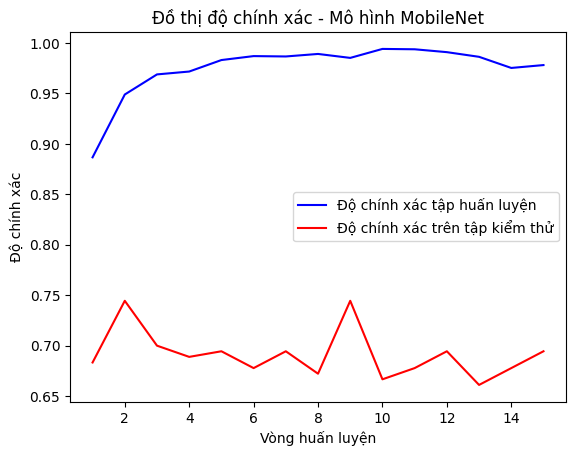

In [33]:
# Đồ thị độ chính xác của mô hình
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
epochs3 = range(1, len(acc3) + 1) # Create a range object for the x-axis of the plot
plt.plot(epochs3, acc3, 'b', label = 'Độ chính xác tập huấn luyện')
plt.plot(epochs3, val_acc3, 'r', label = 'Độ chính xác trên tập kiểm thử')
plt.title('Đồ thị độ chính xác - Mô hình MobileNet')
plt.xlabel('Vòng huấn luyện')
plt.ylabel('Độ chính xác')
plt.legend()
plt.show()

In [34]:

model.save('/content/drive/MyDrive/AI/Mô hình/Moblienet')